# Assignment 3 - Introdução à Aprendizagem Automática

André Eusébio (127600)

Filipe Pereira (131531)

## Exercício 1

### Algoritmo Reinforcement Learning 1

In [ ]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from collections import defaultdict

class Robot:
    def __init__(self, max_passos=1000):
        self.movimentos = {'1': (0, 1),    # direita
                          '2': (0, -1),    # esquerda
                          '3': (1, 0),     # baixo
                          '4': (-1, 0)}    # cima
        self.ambiente = None
        self.estado = (0, 0)
        self.passos = 0
        self.max_passos = max_passos
        self.recompensa = 0
        self.data = None

    def set_ambiente(self, tamanho):
        self.ambiente = np.zeros((tamanho, tamanho))
        self.ambiente[tamanho - 1, tamanho - 1] = 100

    def get_movimento(self, acao):
        return self.movimentos.get(acao, (0, 0))

    def get_estado(self):
        return self.estado

    def atualizar_estado(self, estado):
        if (0 <= estado[0] < self.ambiente.shape[0]) and (0 <= estado[1] < self.ambiente.shape[1]):
            self.estado = estado
            self.passos += 1
            if self.ambiente[self.estado[0], self.estado[1]] == 100 and self.recompensa == 0:
                self.recompensa = 100
                print(f"Objetivo atingido em {self.passos} passos! Recompensa recebida.")
                return True
        return False

    def reiniciar(self):
        self.estado = (0, 0)
        self.passos = 0
        self.recompensa = 0
        print("Posição reiniciada para (0, 0).")

    def transicao(self):
        while self.passos < self.max_passos and self.recompensa == 0:
            acao = self.escolher_acao()
            movimento = self.get_movimento(acao)
            novo_estado = (self.estado[0] + movimento[0], self.estado[1] + movimento[1])

            if (0 <= novo_estado[0] < self.ambiente.shape[0]) and (0 <= novo_estado[1] < self.ambiente.shape[1]):
                if self.atualizar_estado(novo_estado):
                    break

            if self.passos >= self.max_passos:
                print(f"Máximo de passos ({self.max_passos}) atingido sem encontrar o objetivo.")
                break

        return self.estado

    def escolher_acao(self):
        return random.choice(list(self.movimentos.keys()))

    def um_episodio(self):
        resultados = []
        recompensas = []
        tempo = []

        print(f"\nEpisódio 1")
        self.reiniciar()
        inicio_tempo = time.time()
        self.transicao()
        tempo_final = time.time() - inicio_tempo
        print(f"Tempo para episódio 1: {tempo_final:.4f} segundos")
        resultados.append(self.passos)
        recompensas.append(self.recompensa)
        tempo.append(tempo_final)


        self.data = resultados, recompensas, tempo


    def epochs(self, num_epochs):
        resultados = []
        recompensas = []
        tempo = []

        for episodio in range(num_epochs):
            print(f"\nEpisódio {episodio + 1}")
            self.reiniciar()
            inicio_tempo = time.time()
            self.transicao()
            tempo_final = time.time() - inicio_tempo
            print(f"Tempo para episódio {episodio + 1}: {tempo_final:.4f} segundos")
            resultados.append(self.passos)
            recompensas.append(self.recompensa)
            tempo.append(tempo_final)


        self.data = resultados, recompensas, tempo

    def get_data(self):
        return self.data

### 30 iterações do Robot

In [ ]:
robot = Robot()
robot.set_ambiente(10)
robot.epochs(30)


Episódio 1
Posição reiniciada para (0, 0).
Objetivo atingido em 672 passos! Recompensa recebida.
Tempo para episódio 1: 0.0056 segundos

Episódio 2
Posição reiniciada para (0, 0).
Objetivo atingido em 322 passos! Recompensa recebida.
Tempo para episódio 2: 0.0027 segundos

Episódio 3
Posição reiniciada para (0, 0).
Objetivo atingido em 328 passos! Recompensa recebida.
Tempo para episódio 3: 0.0024 segundos

Episódio 4
Posição reiniciada para (0, 0).
Objetivo atingido em 154 passos! Recompensa recebida.
Tempo para episódio 4: 0.0013 segundos

Episódio 5
Posição reiniciada para (0, 0).
Objetivo atingido em 518 passos! Recompensa recebida.
Tempo para episódio 5: 0.0051 segundos

Episódio 6
Posição reiniciada para (0, 0).
Objetivo atingido em 48 passos! Recompensa recebida.
Tempo para episódio 6: 0.0003 segundos

Episódio 7
Posição reiniciada para (0, 0).
Objetivo atingido em 60 passos! Recompensa recebida.
Tempo para episódio 7: 0.0004 segundos

Episódio 8
Posição reiniciada para (0, 0).

### Boxplots da média de Recompensas por Passos, média de Passos e média de Running Time

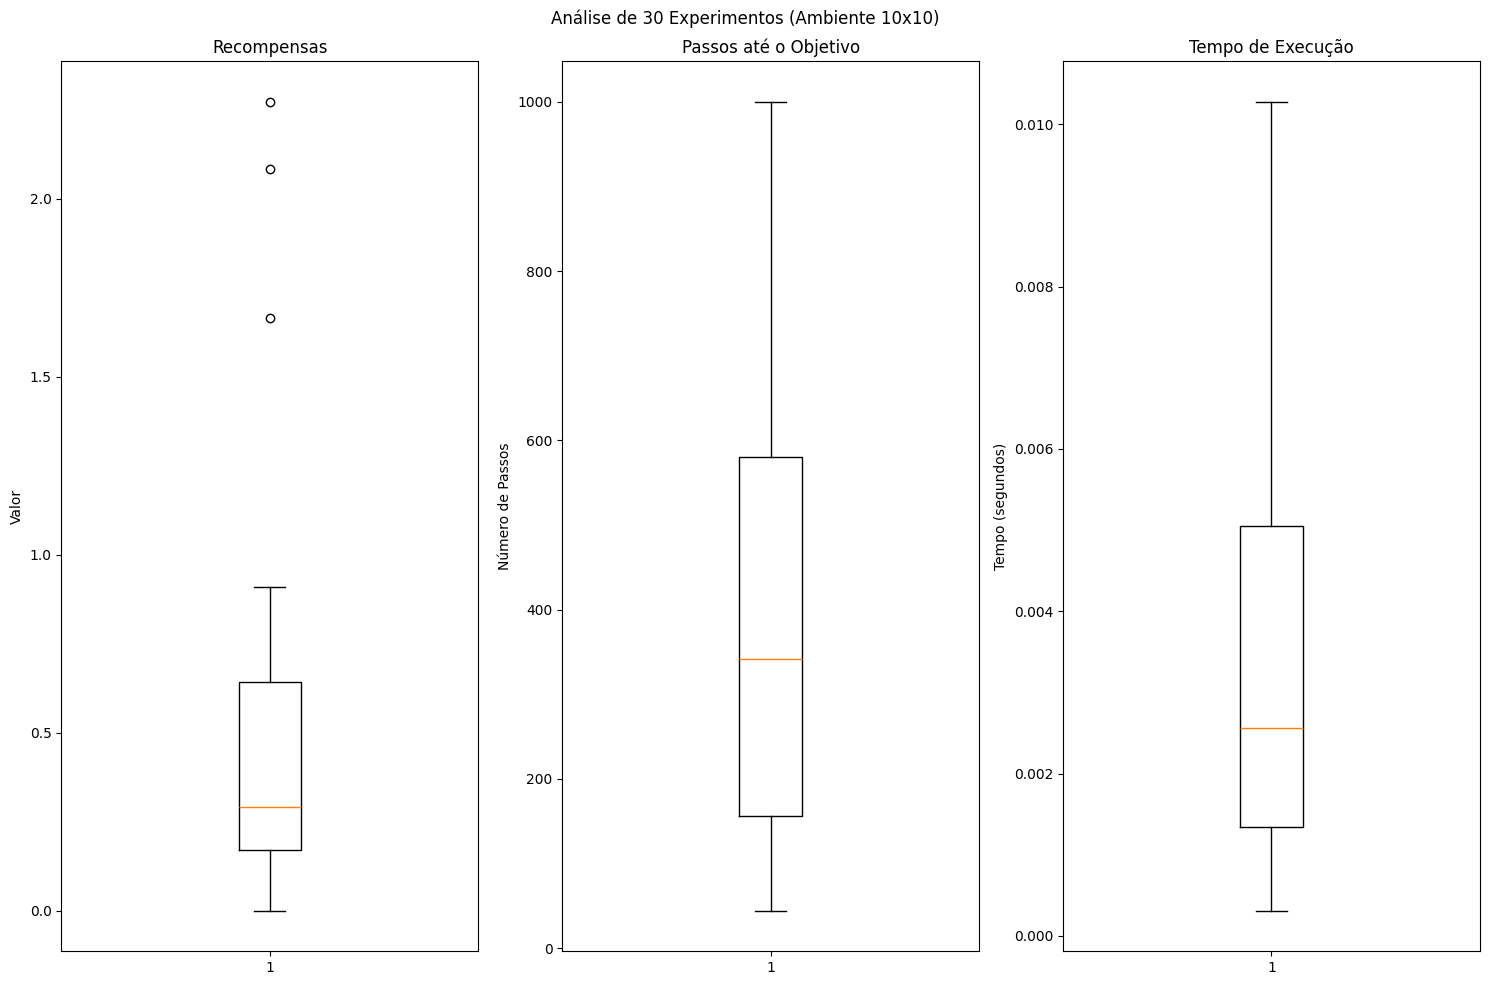

In [ ]:
steps, rewards, times = robot.get_data()

rewards_by_steps = []
for i in range(len(rewards)):
  rewards_by_steps.append(rewards[i]/steps[i])

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 10))
fig.suptitle(f'Análise de {30} Experimentos (Ambiente {10}x{10})')

bplot1 = ax1.boxplot(rewards_by_steps)
ax1.set_title('Recompensas')
ax1.set_ylabel('Valor')

bplot2 = ax2.boxplot(steps)
ax2.set_title('Passos até o Objetivo')
ax2.set_ylabel('Número de Passos')

bplot3 = ax3.boxplot(times)
ax3.set_title('Tempo de Execução')
ax3.set_ylabel('Tempo (segundos)')

plt.tight_layout()
plt.show()

## Exercicio 2, 3, 4

- Algoritmo Q_Learing com modo random, q learning, greed e com escolha de paredes

In [ ]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt
import random

class Robot:
    def __init__(self, tamanho=10, max_passos=20000, alpha=0.7, gamma=0.99, greed=0.9, modo='q_learning', paredes=False):
        self.movimentos = {'1': (0, 1),    # direita
                          '2': (0, -1),    # esquerda
                          '3': (1, 0),     # baixo
                          '4': (-1, 0)}    # cima
        self.ambiente = None
        self.estado = (0, 0)
        self.passos = 0
        self.max_passos = max_passos
        self.recompensa = 0
        self.alpha = alpha
        self.gamma = gamma
        self.tamanho = tamanho
        self.Q = np.zeros((tamanho * tamanho, 4))
        self.test_results = []
        self.execution_times = []
        self.greed = greed
        self.modo = modo  # 'random' ou 'q_learning' ou 'greed'
        self.paredes = paredes # Booleano

    def set_ambiente(self):
      self.ambiente = np.zeros((self.tamanho, self.tamanho))
      self.ambiente[self.tamanho - 1, self.tamanho - 1] = 100

      if self.paredes:
        self.ambiente[:9, 3] = 1
        self.ambiente[1:10, 6] = 1


    def get_movimento(self, acao):
        return self.movimentos.get(acao, (0, 0))

    def get_Q(self):
        return self.Q

    def estado_para_indice(self, estado):
        return estado[0] * self.tamanho + estado[1]

    def atualizar_estado(self, estado):
      if self.passos == self.max_passos:
        self.reiniciar()
      if (0 <= estado[0] < self.ambiente.shape[0]) and (0 <= estado[1] < self.ambiente.shape[1]):
          if self.ambiente[estado[0], estado[1]] != 1:  # Check if the next state is not a wall
              self.estado = estado
              self.passos += 1
              # Check if goal has been reached
              if self.ambiente[self.estado[0], self.estado[1]] == 100:
                  self.recompensa += 100  # Accumulate the reward for reaching the goal
                  self.reiniciar()  # Reset to start position after reaching the goal
                  return True
              else:
                  return True
      return False

    def reiniciar(self):
        self.estado = (0, 0)
        self.passos = 0
        self.recompensa = 0

    def escolher_acao(self):
        if self.modo == 'q_learning':
            estado_idx = self.estado_para_indice(self.estado)
            valores_q = self.Q[estado_idx]
            max_q = np.max(valores_q)
            melhores_acoes = [i for i, v in enumerate(valores_q) if v == max_q]
            acao_escolhida = random.choice(melhores_acoes)
            return str(acao_escolhida+1)
        elif self.modo == 'random':
            return random.choice(['1', '2', '3', '4'])
        elif self.modo == 'greed':
            if random.random() < self.greed:
              estado_idx = self.estado_para_indice(self.estado)
              valores_q = self.Q[estado_idx]
              max_q = np.max(valores_q)
              melhores_acoes = [i for i, v in enumerate(valores_q) if v == max_q]
              acao_escolhida = random.choice(melhores_acoes)
              return str(acao_escolhida+1)
            else:
              return random.choice(['1', '2', '3', '4'])


    def atualizar_q(self, s, a, s_prime, recompensa):
      s_idx = self.estado_para_indice(s)
      s_prime_idx = self.estado_para_indice(s_prime)
      a_idx = int(a) - 1
      max_q_s_prime = np.max(self.Q[s_prime_idx])

      if self.ambiente[s_prime[0], s_prime[1]] == 1:  # If the next state is a wall
          self.Q[s_idx, a_idx] = -100  # Set the Q-value for the action to a very low value
      else:
          self.Q[s_idx, a_idx] = (1 - self.alpha) * self.Q[s_idx, a_idx] + self.alpha * (recompensa + self.gamma * max_q_s_prime)


    def movimento(self):
        s = self.estado
        a = self.escolher_acao()
        movimento = self.get_movimento(a)
        s_prime = (s[0] + movimento[0], s[1] + movimento[1])

        if (0 <= s_prime[0] < self.ambiente.shape[0]) and (0 <= s_prime[1] < self.ambiente.shape[1]):
            if self.ambiente[s_prime[0], s_prime[1]] != 1:
                recompensa = self.ambiente[s_prime[0], s_prime[1]]
                self.atualizar_estado(s_prime)
                self.atualizar_q(s, a, s_prime, recompensa)


    def testar(self, num_testes=1000):
      recompensa_total = 0
      estado_inicial = (0,0)
      for _ in range(num_testes):
          s = self.estado
          a = self.escolher_acao()
          movimento = self.get_movimento(a)
          s_prime = (s[0] + movimento[0], s[1] + movimento[1])

          if (0 <= s_prime[0] < self.ambiente.shape[0]) and (0 <= s_prime[1] < self.ambiente.shape[1]):
              if self.ambiente[s_prime[0], s_prime[1]] != 1:
                  recompensa = self.ambiente[s_prime[0], s_prime[1]]
                  self.atualizar_estado(s_prime)
                  recompensa_total += recompensa

      self.reiniciar()
      return recompensa_total / num_testes


    def executar_experiencias(self, num_experiencias=30):
        pontos_de_teste = [100, 200, 500, 600, 700, 800, 900, 1000, 2500, 5000, 7500,
                           10000, 12500, 15000, 17500, 20000]

        for experiencia in range(num_experiencias):
            self.reiniciar()
            self.set_ambiente()
            recompensa_media_por_teste = []
            if not self.paredes:
              self.Q = np.zeros((self.tamanho * self.tamanho, 4)) #reiniciar Q
            inicio_experiencia = time.time()
            for passo in range(self.max_passos):
                self.movimento()
                if passo in pontos_de_teste:
                    recompensa_media = self.testar()
                    recompensa_media_por_teste.append((passo, recompensa_media))

            tempo_execucao = time.time() - inicio_experiencia
            self.execution_times.append(tempo_execucao)
            self.test_results.append(recompensa_media_por_teste)
            print(f"Tempo de execução da experiência {experiencia + 1}: {tempo_execucao:.4f} segundos")

    def plot_recompensa_media(self):
        pontos_de_teste = [p for p, _ in self.test_results[0]]
        medias_recompensa = [np.mean([exp[p][1] for exp in self.test_results]) for p in range(len(pontos_de_teste))]

        plt.figure(figsize=(10, 6))
        plt.plot(pontos_de_teste, medias_recompensa, marker='o')
        plt.xlabel("Passos")
        plt.ylabel("Recompensa Média")
        plt.title("Passos vs. Recompensa Média")
        plt.grid()
        plt.show()

    def plot_boxplot(self):
        pontos_de_teste = [1000, 5000, 10000, 15000, 20000]
        recompensas_por_teste = [[exp[pontos_de_teste.index(p)][1] for exp in self.test_results] for p in pontos_de_teste]
        fig, axes = plt.subplots(1, len(pontos_de_teste), figsize=(15, 8))

        for i, p in enumerate(pontos_de_teste):
            axes[i].boxplot(recompensas_por_teste[i], widths=0.5)
            axes[i].set_title(f"Passo: {p}")
            axes[i].set_xlabel("Experiências")
            axes[i].set_ylabel("Recompensa Média")
            axes[i].grid(True)

        plt.tight_layout()
        plt.show()

    def plot_mapa_calor_q(self):
      valores_maximos_q = np.max(self.Q.reshape(self.tamanho, self.tamanho, 4), axis=2)
      plt.figure(figsize=(8, 6))
      plt.imshow(valores_maximos_q, cmap='hot')
      plt.colorbar(label="Utilidade Máxima por Estado")
      plt.title("Mapa de Calor da Utilidade Final de Cada Estado")
      plt.show()

    def calcular_tempo_medio_e_desvio(self):
        media_tempo = np.mean(self.execution_times)
        desvio_tempo = np.std(self.execution_times)
        print(f"Tempo médio de execução: {media_tempo:.4f} segundos")
        print(f"Desvio padrão dos tempos de execução: {desvio_tempo:.4f} segundos")
        return media_tempo, desvio_tempo


### Ação random

Tempo de execução da experiência 1: 0.3954 segundos
Tempo de execução da experiência 2: 0.4386 segundos
Tempo de execução da experiência 3: 0.4315 segundos
Tempo de execução da experiência 4: 0.4080 segundos
Tempo de execução da experiência 5: 0.4298 segundos
Tempo de execução da experiência 6: 0.4382 segundos
Tempo de execução da experiência 7: 0.4345 segundos
Tempo de execução da experiência 8: 0.2888 segundos
Tempo de execução da experiência 9: 0.2394 segundos
Tempo de execução da experiência 10: 0.2438 segundos
Tempo de execução da experiência 11: 0.2458 segundos
Tempo de execução da experiência 12: 0.2600 segundos
Tempo de execução da experiência 13: 0.2492 segundos
Tempo de execução da experiência 14: 0.2472 segundos
Tempo de execução da experiência 15: 0.2444 segundos
Tempo de execução da experiência 16: 0.2499 segundos
Tempo de execução da experiência 17: 0.2391 segundos
Tempo de execução da experiência 18: 0.2431 segundos
Tempo de execução da experiência 19: 0.2499 segundos
Te

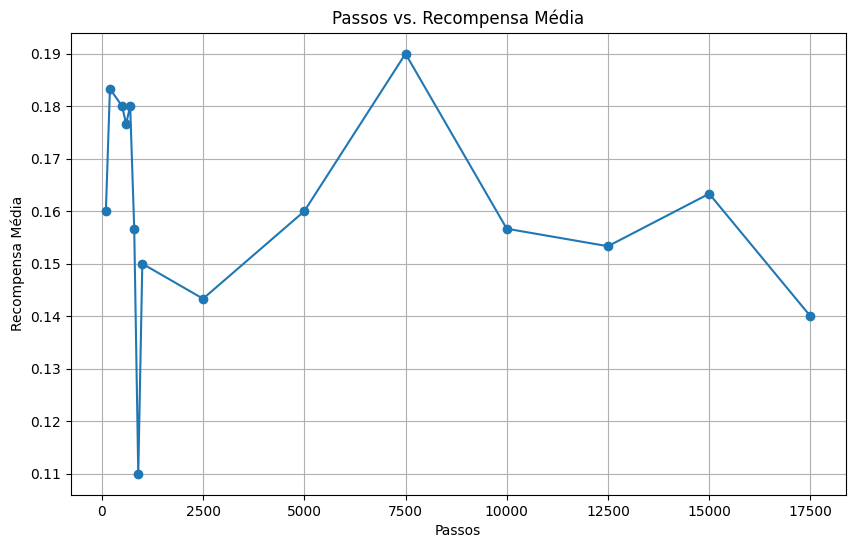

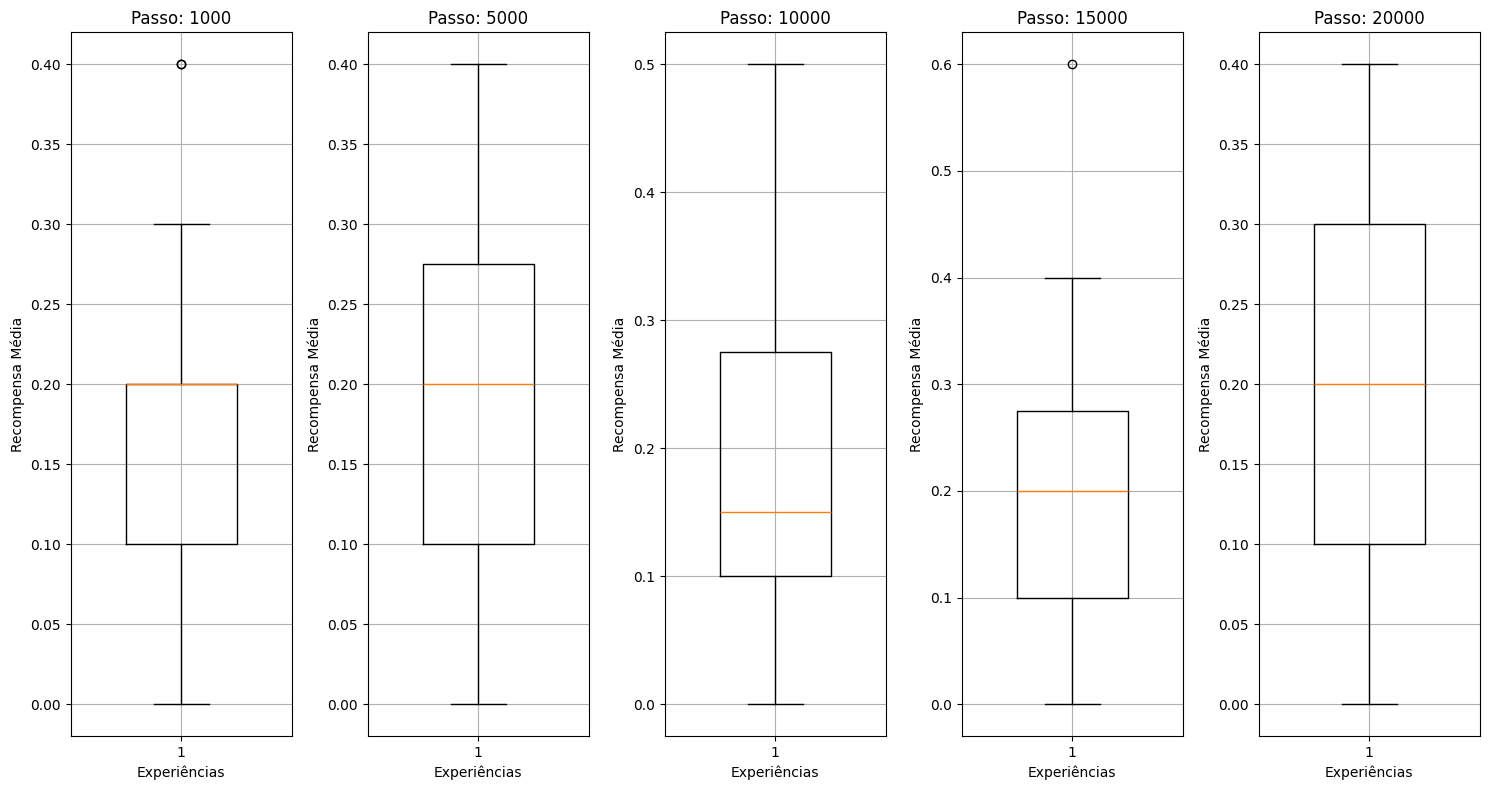

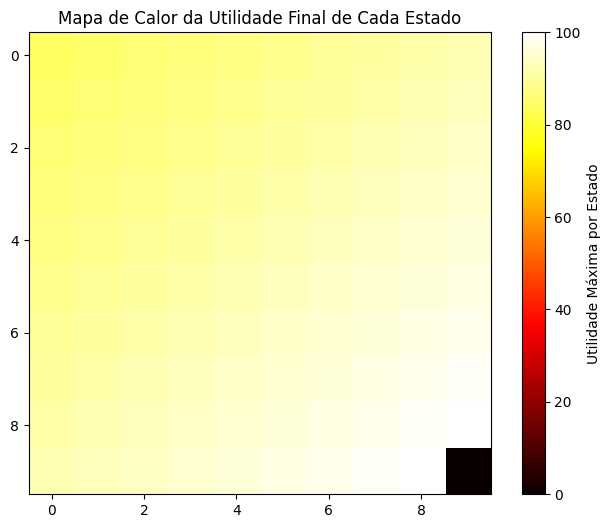

In [ ]:
tamanho = 10
robot_random = Robot(tamanho, modo='random')
robot_random.executar_experiencias()

robot_random.calcular_tempo_medio_e_desvio()
robot_random.plot_recompensa_media()
print()
robot_random.plot_boxplot()
print()
robot_random.plot_mapa_calor_q()

### Melhor ação Q Learning

Tempo de execução da experiência 1: 0.5264 segundos
Tempo de execução da experiência 2: 0.5299 segundos
Tempo de execução da experiência 3: 0.5093 segundos
Tempo de execução da experiência 4: 0.5396 segundos
Tempo de execução da experiência 5: 0.5246 segundos
Tempo de execução da experiência 6: 0.6990 segundos
Tempo de execução da experiência 7: 0.8687 segundos
Tempo de execução da experiência 8: 0.8851 segundos
Tempo de execução da experiência 9: 0.8634 segundos
Tempo de execução da experiência 10: 0.5318 segundos
Tempo de execução da experiência 11: 0.5013 segundos
Tempo de execução da experiência 12: 0.5261 segundos
Tempo de execução da experiência 13: 0.5077 segundos
Tempo de execução da experiência 14: 0.5369 segundos
Tempo de execução da experiência 15: 0.5676 segundos
Tempo de execução da experiência 16: 0.5188 segundos
Tempo de execução da experiência 17: 0.5041 segundos
Tempo de execução da experiência 18: 0.5398 segundos
Tempo de execução da experiência 19: 0.5335 segundos
Te

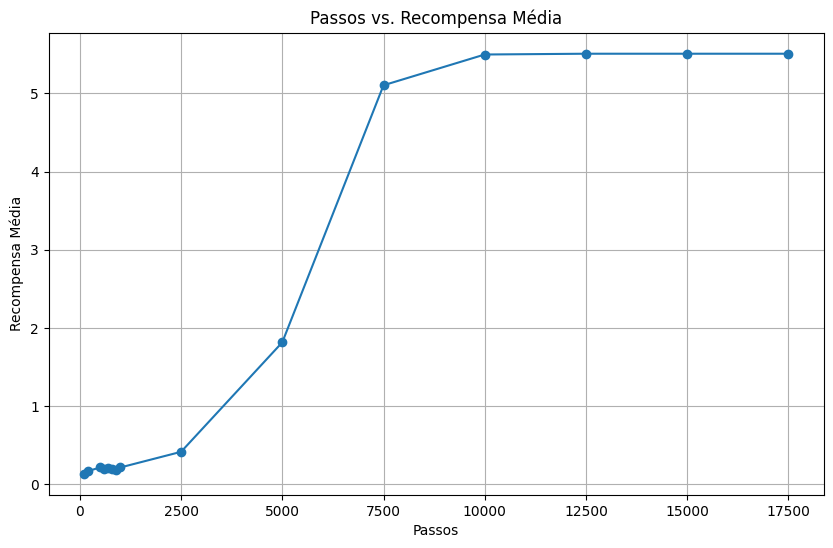

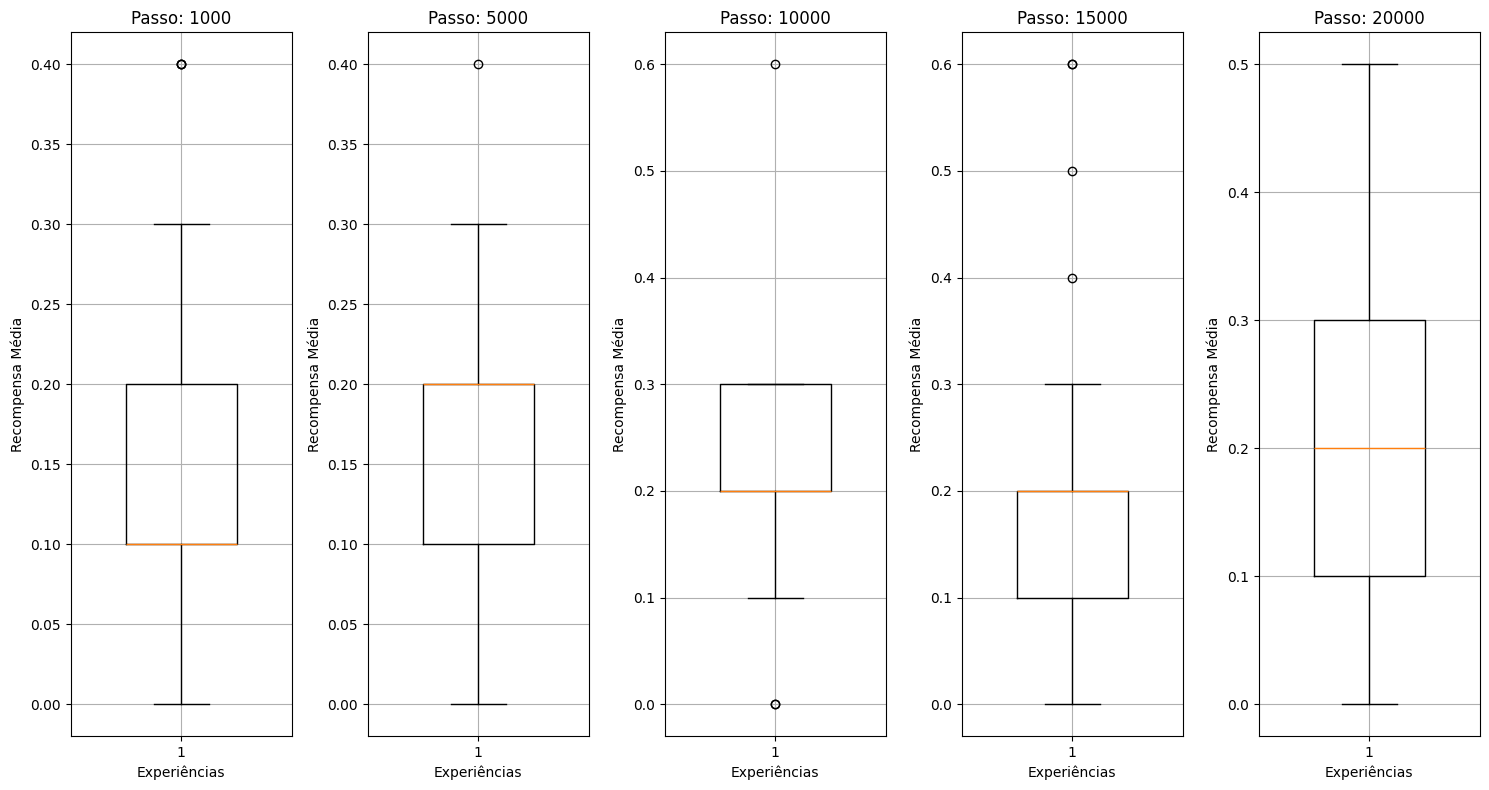

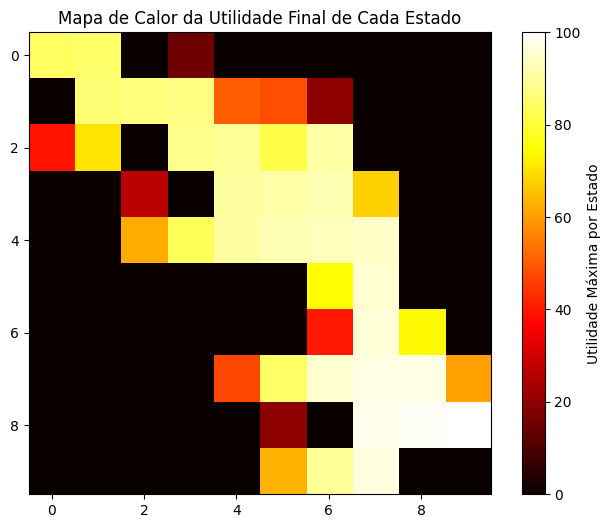

In [ ]:
tamanho = 10
robot_Q = Robot(tamanho, modo='q_learning', alpha =0.8 )
robot_Q.executar_experiencias()

robot_Q.calcular_tempo_medio_e_desvio()
robot_Q.plot_recompensa_media()
print()
robot_Q.plot_boxplot()

print()
robot_Q.plot_mapa_calor_q()

### Implementação de Greed

Tempo de execução da experiência 1: 0.5227 segundos
Tempo de execução da experiência 2: 0.4956 segundos
Tempo de execução da experiência 3: 0.5116 segundos
Tempo de execução da experiência 4: 0.4930 segundos
Tempo de execução da experiência 5: 0.5015 segundos
Tempo de execução da experiência 6: 0.4897 segundos
Tempo de execução da experiência 7: 0.5176 segundos
Tempo de execução da experiência 8: 0.4893 segundos
Tempo de execução da experiência 9: 0.5071 segundos
Tempo de execução da experiência 10: 0.5060 segundos
Tempo de execução da experiência 11: 0.5049 segundos
Tempo de execução da experiência 12: 0.5072 segundos
Tempo de execução da experiência 13: 0.4977 segundos
Tempo de execução da experiência 14: 0.4963 segundos
Tempo de execução da experiência 15: 0.5059 segundos
Tempo de execução da experiência 16: 0.4858 segundos
Tempo de execução da experiência 17: 0.4986 segundos
Tempo de execução da experiência 18: 0.4813 segundos
Tempo de execução da experiência 19: 0.6771 segundos
Te

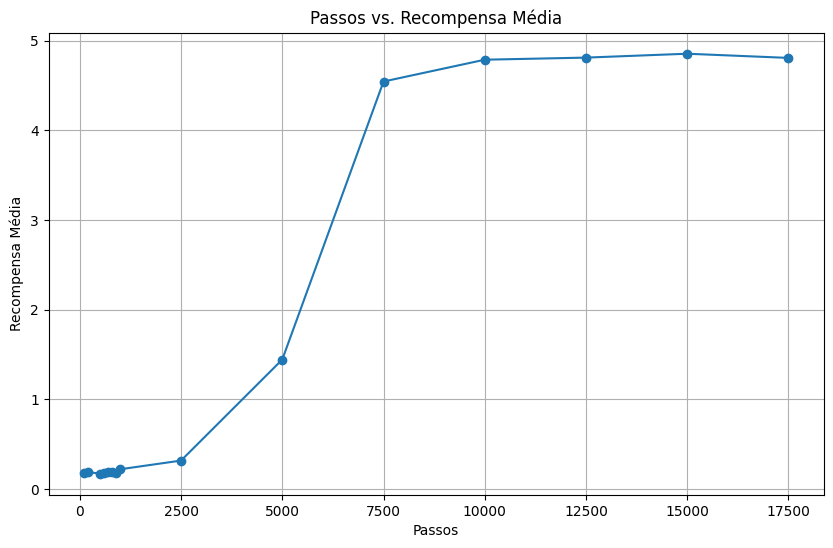

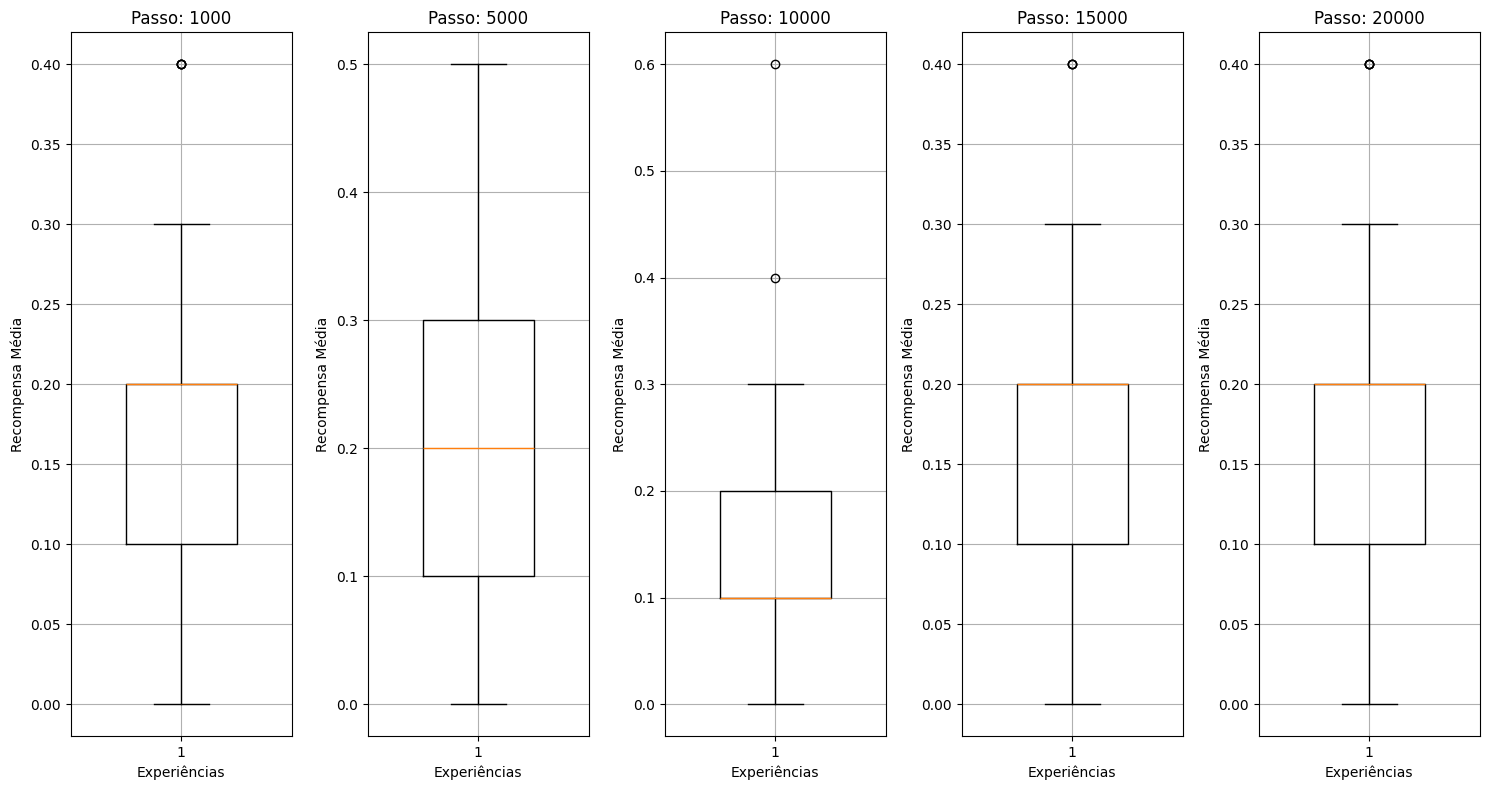

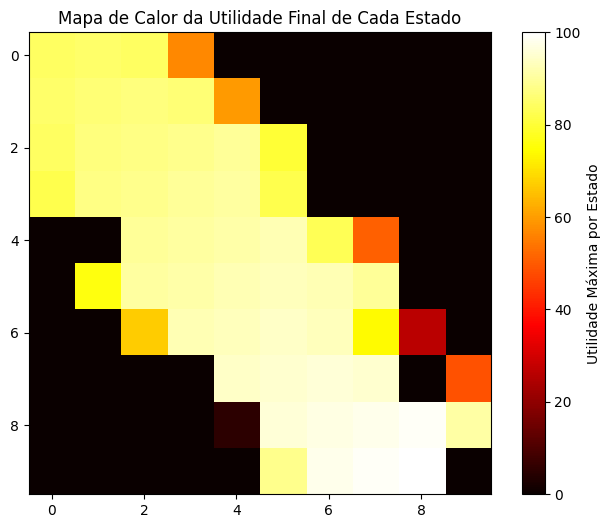

In [ ]:
tamanho = 10
robot_random = Robot(tamanho, modo='greed', greed=0.9)
robot_random.executar_experiencias()

robot_random.calcular_tempo_medio_e_desvio()
robot_random.plot_recompensa_media()
print()
robot_random.plot_boxplot()
print()
robot_random.plot_mapa_calor_q()

### Implementação de Paredes


Tempo de execução da experiência 1: 0.5366 segundos
Tempo de execução da experiência 2: 0.6488 segundos
Tempo de execução da experiência 3: 0.8154 segundos
Tempo de execução da experiência 4: 0.8824 segundos
Tempo de execução da experiência 5: 0.9357 segundos
Tempo de execução da experiência 6: 0.5134 segundos
Tempo de execução da experiência 7: 0.5296 segundos
Tempo de execução da experiência 8: 0.5155 segundos
Tempo de execução da experiência 9: 0.5302 segundos
Tempo de execução da experiência 10: 0.5154 segundos
Tempo de execução da experiência 11: 0.5174 segundos
Tempo de execução da experiência 12: 0.5326 segundos
Tempo de execução da experiência 13: 0.5145 segundos
Tempo de execução da experiência 14: 0.5437 segundos
Tempo de execução da experiência 15: 0.5172 segundos
Tempo de execução da experiência 16: 0.5352 segundos
Tempo de execução da experiência 17: 0.5212 segundos
Tempo de execução da experiência 18: 0.5416 segundos
Tempo de execução da experiência 19: 0.5080 segundos
Te

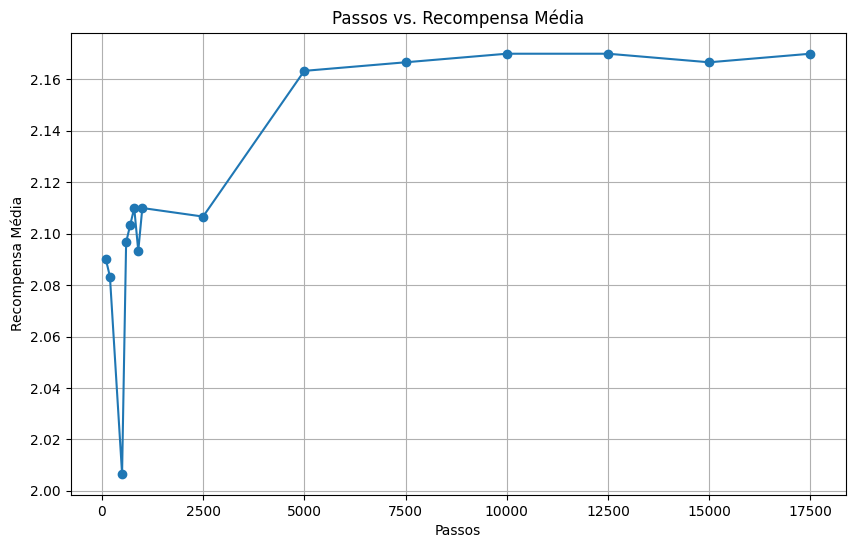

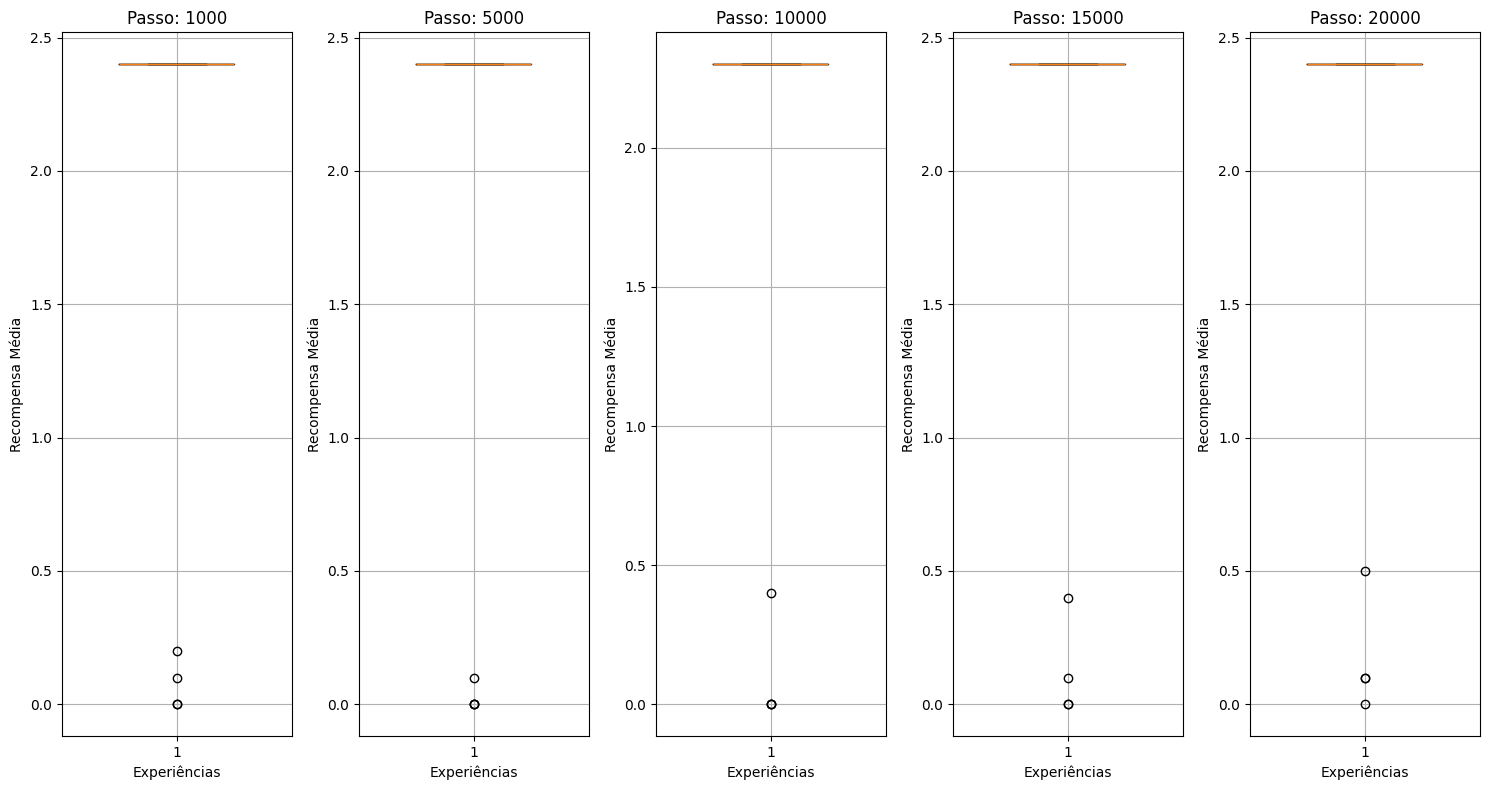

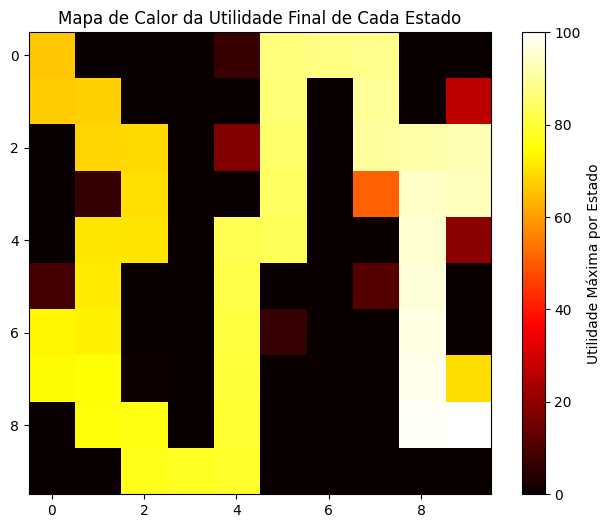

In [ ]:
tamanho = 10
robot_Q_parede = Robot(tamanho,max_passos=20000, alpha=0.7, gamma=0.99, paredes=True)
robot_Q_parede.set_ambiente()
robot_Q_parede.executar_experiencias()

robot_Q_parede.calcular_tempo_medio_e_desvio()
robot_Q_parede.plot_recompensa_media()
print()
robot_Q_parede.plot_boxplot()
print()
robot_Q_parede.plot_mapa_calor_q()

## Exercicio 5

In [ ]:
from re import X
import numpy as np
import random
import time
import matplotlib.pyplot as plt
import random

class Robot:
    def __init__(self, probabilidade= 0.95,tamanho=10, max_passos=20000, alpha=0.7, gamma=0.99, greed=0.9, modo='q_learning', paredes=False):
        self.movimentos = {'1': (0, 1),    # direita
                          '2': (0, -1),    # esquerda
                          '3': (1, 0),     # baixo
                          '4': (-1, 0)}    # cima
        self.ambiente = None
        self.probabilidade = probabilidade
        self.estado = (0, 0)
        self.passos = 0
        self.max_passos = max_passos
        self.recompensa = 0
        self.alpha = alpha
        self.gamma = gamma
        self.tamanho = tamanho
        self.Q = np.zeros((tamanho * tamanho, 4))
        self.test_results = []
        self.execution_times = []
        self.greed = greed
        self.modo = modo  # 'random' ou 'q_learning' ou 'greed'
        self.paredes = paredes # Booleano

    def set_ambiente(self):
      self.ambiente = np.zeros((self.tamanho, self.tamanho))
      self.ambiente[self.tamanho - 1, self.tamanho - 1] = 100

      if self.paredes:
        self.ambiente[:9, 3] = 1
        self.ambiente[1:10, 6] = 1


    def get_movimento(self, acao):
        return self.movimentos.get(acao, (0, 0))

    def get_Q(self):
        return self.Q

    def estado_para_indice(self, estado):
        return estado[0] * self.tamanho + estado[1]

    def atualizar_estado(self, estado):
      if self.passos == self.max_passos:
        self.reiniciar()
      if (0 <= estado[0] < self.ambiente.shape[0]) and (0 <= estado[1] < self.ambiente.shape[1]):
          if self.ambiente[estado[0], estado[1]] != 1:  # Check if the next state is not a wall
              self.estado = estado
              self.passos += 1
              # Check if goal has been reached
              if self.ambiente[self.estado[0], self.estado[1]] == 100:
                  self.recompensa += 100  # Accumulate the reward for reaching the goal
                  self.reiniciar()  # Reset to start position after reaching the goal
                  return True
              else:
                  return True
      return False

    def reiniciar(self):
        self.estado = (0, 0)
        self.passos = 0
        self.recompensa = 0

    def escolher_acao(self):
        if self.modo == 'q_learning':
            estado_idx = self.estado_para_indice(self.estado)
            valores_q = self.Q[estado_idx]
            max_q = np.max(valores_q)
            melhores_acoes = [i for i, v in enumerate(valores_q) if v == max_q]
            acao_escolhida = random.choice(melhores_acoes)
            return str(acao_escolhida+1)
        elif self.modo == 'random':
            return random.choice(['1', '2', '3', '4'])
        elif self.modo == 'greed':
            if random.random() < self.greed:
              estado_idx = self.estado_para_indice(self.estado)
              valores_q = self.Q[estado_idx]
              max_q = np.max(valores_q)
              melhores_acoes = [i for i, v in enumerate(valores_q) if v == max_q]
              acao_escolhida = random.choice(melhores_acoes)
              return str(acao_escolhida+1)
            else:
              return random.choice(['1', '2', '3', '4'])


    def atualizar_q(self, s, a, s_prime, recompensa):
      s_idx = self.estado_para_indice(s)
      s_prime_idx = self.estado_para_indice(s_prime)
      a_idx = int(a) - 1
      max_q_s_prime = np.max(self.Q[s_prime_idx])

      if self.ambiente[s_prime[0], s_prime[1]] == 1:  # If the next state is a wall
          self.Q[s_idx, a_idx] = -100  # Set the Q-value for the action to a very low value
      else:
          self.Q[s_idx, a_idx] = (1 - self.alpha) * self.Q[s_idx, a_idx] + self.alpha * (recompensa + self.gamma * max_q_s_prime)


    def movimento(self):
        s = self.estado
        a = self.escolher_acao()
        if random.random() < self.probabilidade:
            # Move to a random nearby position (either left or right)
            x = (s[0] + random.choice([-1, 1]), s[1] + random.choice([-1, 1]))
            if (0 <= x[0] < self.ambiente.shape[0]) and (0 <= x[1] < self.ambiente.shape[1]):
              s = x

        movimento = self.get_movimento(a)
        s_prime = (s[0] + movimento[0], s[1] + movimento[1])

        if (0 <= s_prime[0] < self.ambiente.shape[0]) and (0 <= s_prime[1] < self.ambiente.shape[1]):
            if self.ambiente[s_prime[0], s_prime[1]] != 1:
                recompensa = self.ambiente[s_prime[0], s_prime[1]]
                self.atualizar_estado(s_prime)
                self.atualizar_q(s, a, s_prime, recompensa)


    def testar(self, num_testes=1000):
      recompensa_total = 0
      estado_inicial = (0,0)
      for _ in range(num_testes):
          s = self.estado
          a = self.escolher_acao()
          movimento = self.get_movimento(a)
          s_prime = (s[0] + movimento[0], s[1] + movimento[1])

          if (0 <= s_prime[0] < self.ambiente.shape[0]) and (0 <= s_prime[1] < self.ambiente.shape[1]):
              if self.ambiente[s_prime[0], s_prime[1]] != 1:
                  recompensa = self.ambiente[s_prime[0], s_prime[1]]
                  self.atualizar_estado(s_prime)
                  recompensa_total += recompensa

      self.reiniciar()
      return recompensa_total / num_testes


    def executar_experiencias(self, num_experiencias=30):
        pontos_de_teste = [100, 200, 500, 600, 700, 800, 900, 1000, 2500, 5000, 7500,
                           10000, 12500, 15000, 17500, 20000]

        for experiencia in range(num_experiencias):
            self.reiniciar()
            self.set_ambiente()
            recompensa_media_por_teste = []
            inicio_experiencia = time.time()
            for passo in range(self.max_passos):
                self.movimento()
                if passo in pontos_de_teste:
                    recompensa_media = self.testar()
                    recompensa_media_por_teste.append((passo, recompensa_media))

            tempo_execucao = time.time() - inicio_experiencia
            self.execution_times.append(tempo_execucao)
            self.test_results.append(recompensa_media_por_teste)
            print(f"Tempo de execução da experiência {experiencia + 1}: {tempo_execucao:.4f} segundos")

    def plot_recompensa_media(self):
        pontos_de_teste = [p for p, _ in self.test_results[0]]
        medias_recompensa = [np.mean([exp[p][1] for exp in self.test_results]) for p in range(len(pontos_de_teste))]

        plt.figure(figsize=(10, 6))
        plt.plot(pontos_de_teste, medias_recompensa, marker='o')
        plt.xlabel("Passos")
        plt.ylabel("Recompensa Média")
        plt.title("Passos vs. Recompensa Média")
        plt.grid()
        plt.show()

    def plot_boxplot(self):
        pontos_de_teste = [1000, 5000, 10000, 15000, 20000]
        recompensas_por_teste = [[exp[pontos_de_teste.index(p)][1] for exp in self.test_results] for p in pontos_de_teste]
        fig, axes = plt.subplots(1, len(pontos_de_teste), figsize=(15, 8))

        for i, p in enumerate(pontos_de_teste):
            axes[i].boxplot(recompensas_por_teste[i], widths=0.5)
            axes[i].set_title(f"Passo: {p}")
            axes[i].set_xlabel("Experiências")
            axes[i].set_ylabel("Recompensa Média")
            axes[i].grid(True)

        plt.tight_layout()
        plt.show()

    def plot_mapa_calor_q(self):
      valores_maximos_q = np.max(self.Q.reshape(self.tamanho, self.tamanho, 4), axis=2)
      plt.figure(figsize=(8, 6))
      plt.imshow(valores_maximos_q, cmap='hot')
      plt.colorbar(label="Utilidade Máxima por Estado")
      plt.title("Mapa de Calor da Utilidade Final de Cada Estado")
      plt.show()

    def calcular_tempo_medio_e_desvio(self):
        media_tempo = np.mean(self.execution_times)
        desvio_tempo = np.std(self.execution_times)
        print(f"Tempo médio de execução: {media_tempo:.4f} segundos")
        print(f"Desvio padrão dos tempos de execução: {desvio_tempo:.4f} segundos")
        return media_tempo, desvio_tempo


Tempo de execução da experiência 1: 0.8839 segundos
Tempo de execução da experiência 2: 0.9070 segundos
Tempo de execução da experiência 3: 0.5364 segundos
Tempo de execução da experiência 4: 0.5300 segundos
Tempo de execução da experiência 5: 0.5184 segundos
Tempo de execução da experiência 6: 0.5376 segundos
Tempo de execução da experiência 7: 0.5294 segundos
Tempo de execução da experiência 8: 0.5417 segundos
Tempo de execução da experiência 9: 0.5109 segundos
Tempo de execução da experiência 10: 0.5321 segundos
Tempo de execução da experiência 11: 0.5065 segundos
Tempo de execução da experiência 12: 0.5390 segundos
Tempo de execução da experiência 13: 0.5058 segundos
Tempo de execução da experiência 14: 0.5373 segundos
Tempo de execução da experiência 15: 0.5160 segundos
Tempo de execução da experiência 16: 0.5462 segundos
Tempo de execução da experiência 17: 0.5266 segundos
Tempo de execução da experiência 18: 0.5357 segundos
Tempo de execução da experiência 19: 0.5347 segundos
Te

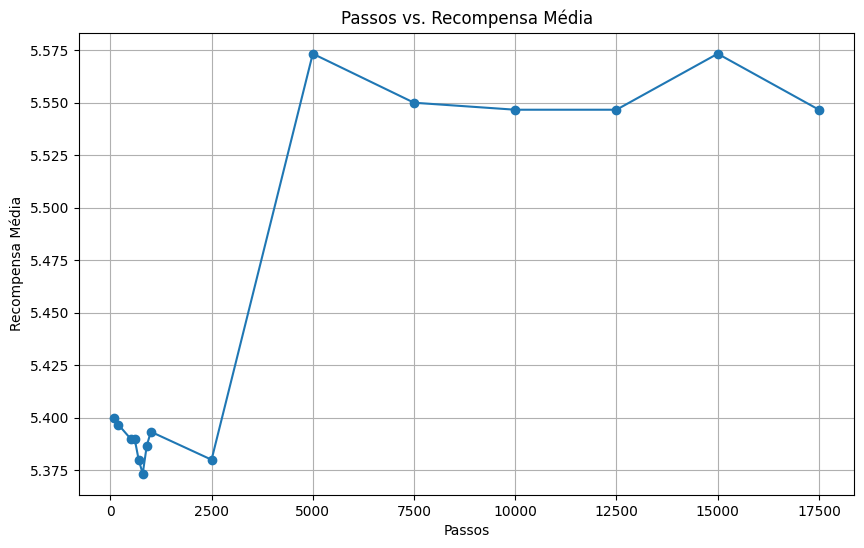

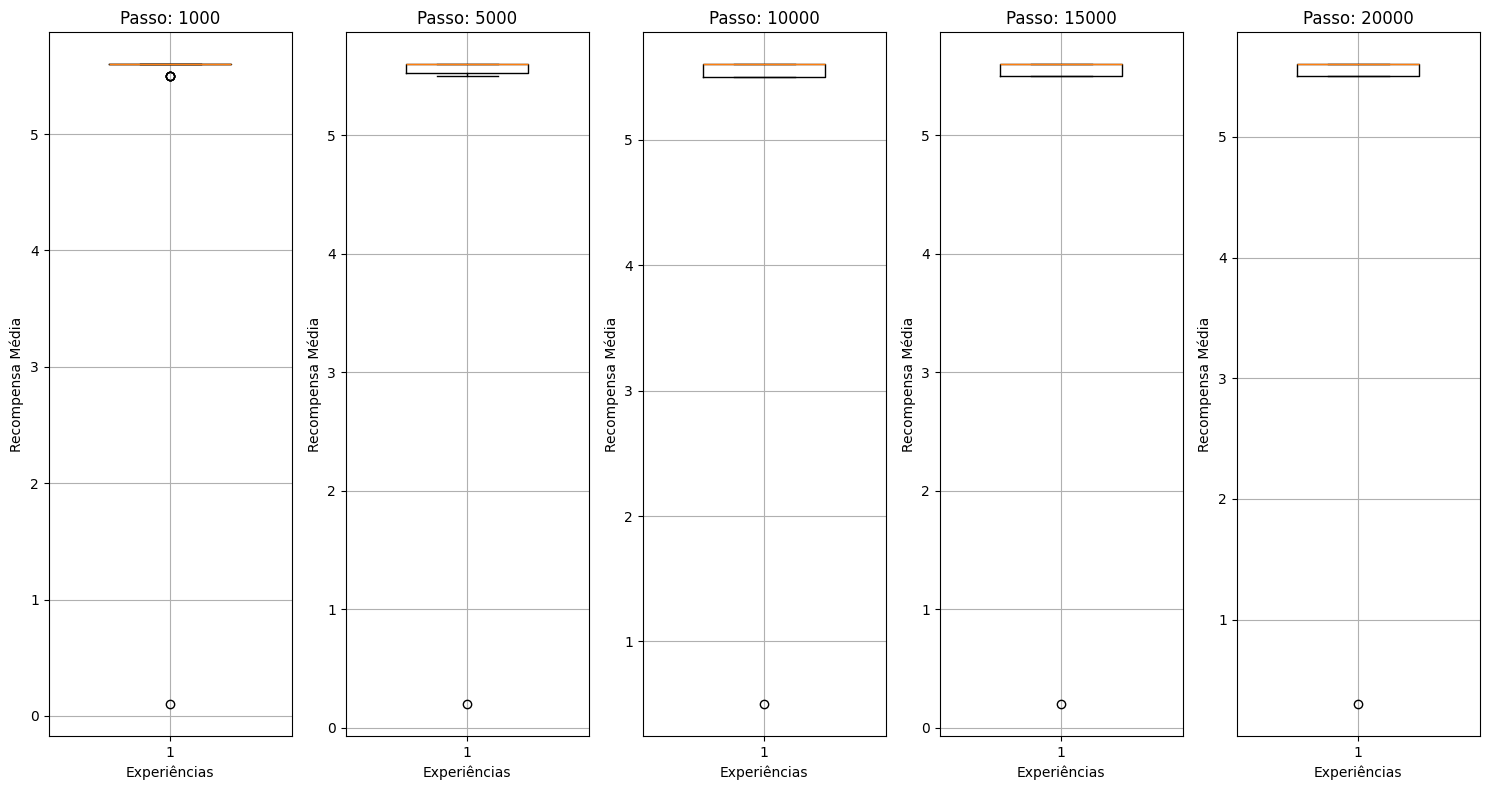

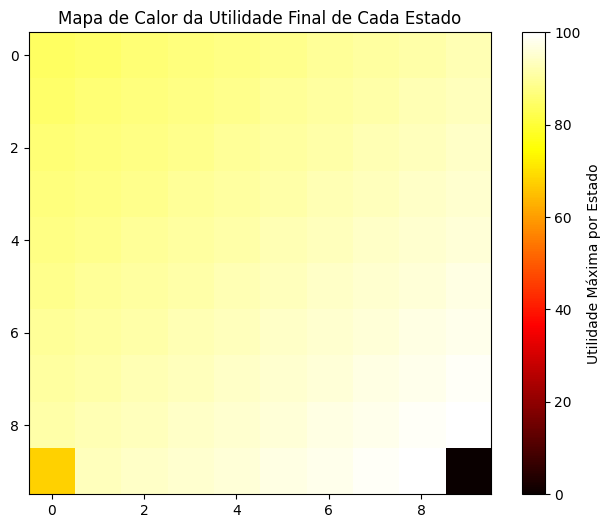

Tempo médio de execução: 0.5953 segundos
Desvio padrão dos tempos de execução: 0.1353 segundos
Tempo médio de execução: 0.5953 segundos
Desvio padrão dos tempos de execução: 0.1353 segundos


In [ ]:
# Create an instance of the Robot class
robot = Robot(tamanho=10, probabilidade=0.1, max_passos=20000, alpha=0.7, gamma=0.99, greed=0.9, modo='q_learning')

# Set the environment (including walls)
robot.set_ambiente()

# Train the robot using experiences (30 experiences in this case)
robot.executar_experiencias(num_experiencias=30)

# Plot the results

# 1. Plot the average reward over the number of steps
robot.plot_recompensa_media()

# 2. Plot a boxplot for rewards at specific steps
robot.plot_boxplot()

# 3. Plot the heatmap for Q-values (maximum value per state)
robot.plot_mapa_calor_q()

# 4. Calculate and display the average time and its standard deviation
media_tempo, desvio_tempo = robot.calcular_tempo_medio_e_desvio()

print(f"Tempo médio de execução: {media_tempo:.4f} segundos")
print(f"Desvio padrão dos tempos de execução: {desvio_tempo:.4f} segundos")
